# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

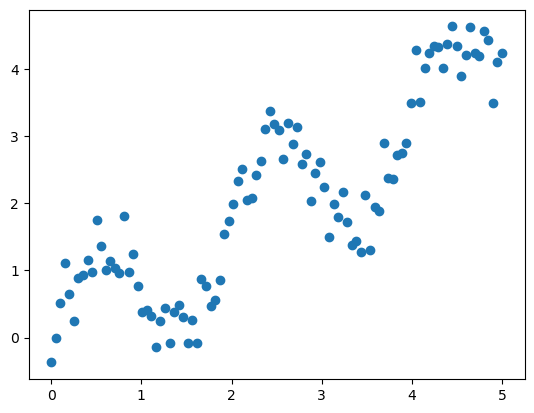

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5679482379163637


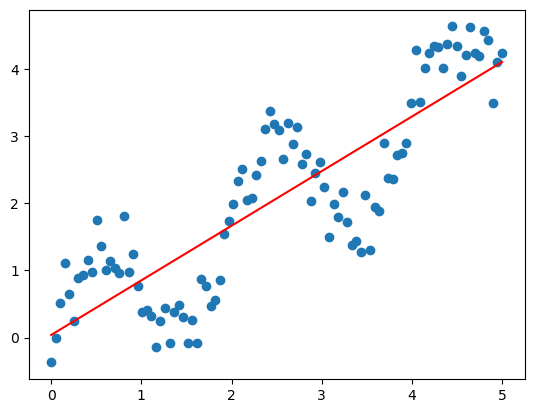

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

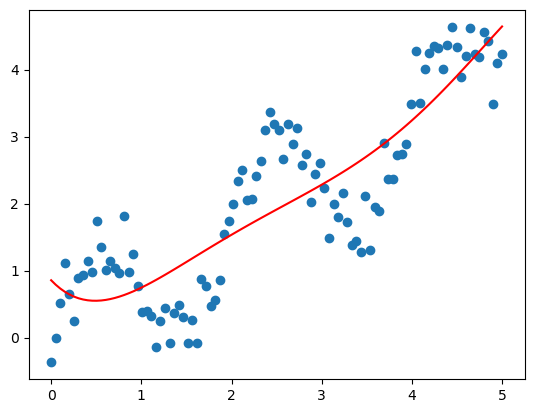

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.4153166   1.97347031 -0.80946939  0.15093285 -0.01011887]
interception:  0.856170434231784


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.85617043, 0.78962034, 0.73252592, 0.68429632, 0.64436349,
       0.61218175, 0.58722736, 0.5689982 , 0.55701329, 0.55081244,
       0.54995583, 0.55402363, 0.56261557, 0.57535058, 0.59186634,
       0.61181895, 0.63488246, 0.66074853, 0.68912599, 0.71974044,
       0.7523339 , 0.78666435, 0.82250537, 0.85964574, 0.89788901,
       0.93705312, 0.97697003, 1.01748526, 1.05845755, 1.09975843,
       1.1412718 , 1.18289359, 1.22453132, 1.26610371, 1.30754026,
       1.3487809 , 1.38977554, 1.43048371, 1.47087414, 1.51092435,
       1.55062029, 1.58995589, 1.62893272, 1.66755953, 1.7058519 ,
       1.74383181, 1.78152725, 1.81897184, 1.85620439, 1.89326854,
       1.93021235, 1.96708788, 2.00395083, 2.04086011, 2.07787743,
       2.11506694, 2.15249483, 2.19022887, 2.22833809, 2.26689232,
       2.30596185, 2.34561695, 2.38592755, 2.4269628 , 2.46879069,
       2.51147761, 2.55508803, 2.59968401, 2.64532486, 2.69206673,
       2.7399622 , 2.78905988, 2.83940403, 2.89103414, 2.94398

In [15]:
regr_poly.predict(X_poly)

array([0.85617043, 0.78962034, 0.73252592, 0.68429632, 0.64436349,
       0.61218175, 0.58722736, 0.5689982 , 0.55701329, 0.55081244,
       0.54995583, 0.55402363, 0.56261557, 0.57535058, 0.59186634,
       0.61181895, 0.63488246, 0.66074853, 0.68912599, 0.71974044,
       0.7523339 , 0.78666435, 0.82250537, 0.85964574, 0.89788901,
       0.93705312, 0.97697003, 1.01748526, 1.05845755, 1.09975843,
       1.1412718 , 1.18289359, 1.22453132, 1.26610371, 1.30754026,
       1.3487809 , 1.38977554, 1.43048371, 1.47087414, 1.51092435,
       1.55062029, 1.58995589, 1.62893272, 1.66755953, 1.7058519 ,
       1.74383181, 1.78152725, 1.81897184, 1.85620439, 1.89326854,
       1.93021235, 1.96708788, 2.00395083, 2.04086011, 2.07787743,
       2.11506694, 2.15249483, 2.19022887, 2.22833809, 2.26689232,
       2.30596185, 2.34561695, 2.38592755, 2.4269628 , 2.46879069,
       2.51147761, 2.55508803, 2.59968401, 2.64532486, 2.69206673,
       2.7399622 , 2.78905988, 2.83940403, 2.89103414, 2.94398

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

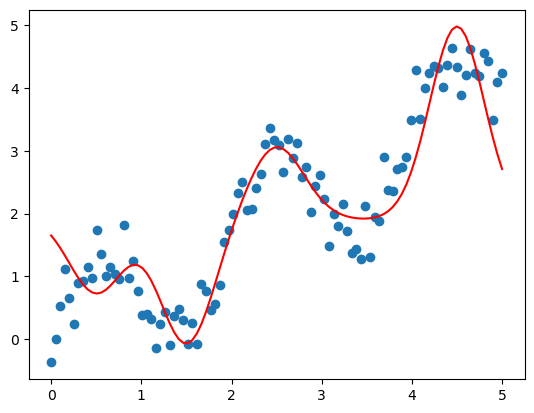

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.22125208 -2.02510135  1.11095971 -0.04998518  3.02642881]
interception:  1.9563619927121336


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

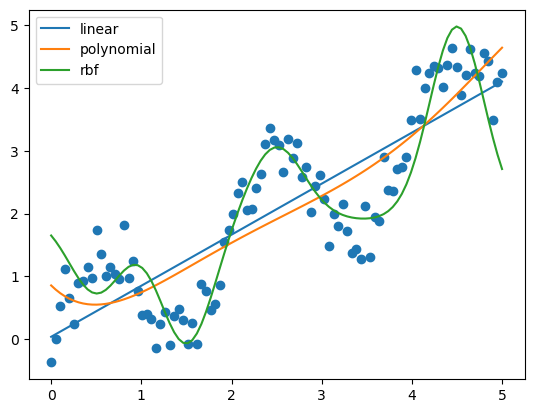

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5679482379163637


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5128318081332562


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.31014324408596133
